## Task 4: Predicting Insurance Claim Amounts

### 1. Introduction and Problem Statement

The objective of this task is to build a **regression model** that can accurately estimate the medical insurance charges for a person based on their **age, gender, BMI, number of children, smoking status, and region**. Predicting insurance costs is crucial for both **insurance companies** (for effective risk assessment) and **individuals** (for better financial planning).


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 2. Dataset Understanding and Description

The **Medical Cost Personal Dataset** contains information about insurance contractors along with their medical expenses. The dataset includes the following variables:

- **age**: Age of the primary beneficiary.
- **sex**: Insurance contractor gender (female, male).
- **bmi**: Body Mass Index, providing an understanding of body weight relative to height *(kg/m²)*.
- **children**: Number of children covered by health insurance / number of dependents.
- **smoker**: Smoking status (yes, no).
- **region**: The beneficiary's residential area in the US (northeast, southeast, southwest, northwest).
- **charges**: Individual medical costs billed by health insurance (**target variable**).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Download latest version of the dataset
path = kagglehub.dataset_download("mragpavank/insurance1")
print("Path to dataset files:", path)

# List files in the directory to find the CSV name
files = os.listdir(path)
csv_filename = [f for f in files if f.endswith('.csv')][0]
full_path = os.path.join(path, csv_filename)

# Load the dataset into 'df'
df = pd.read_csv(full_path)

# Initial inspection
print("\nDataset Head:")
print(df.head())

print("\nDataset Info:")
print(df.info())

Path to dataset files: /kaggle/input/insurance1

Dataset Head:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


## 3. Data Cleaning and Preparation

Before training the model, categorical variables such as **sex** and **smoker** must be converted into numerical values so that the **Linear Regression** model can properly process and learn from the data.


In [4]:
# Check for missing values
print("Missing values count:")
print(df.isnull().sum())

# Encoding categorical variables
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

print("\nEncoded Data (Head):")
print(df.head())

Missing values count:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Encoded Data (Head):
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


## 4. Exploratory Data Analysis (EDA)

We visualize the relationships between demographic factors and insurance charges to identify patterns and understand the key drivers influencing insurance costs.


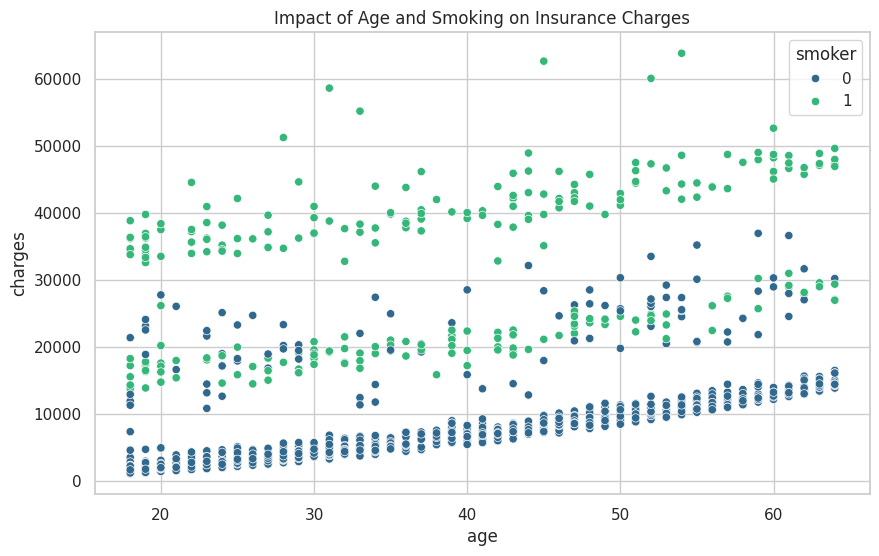

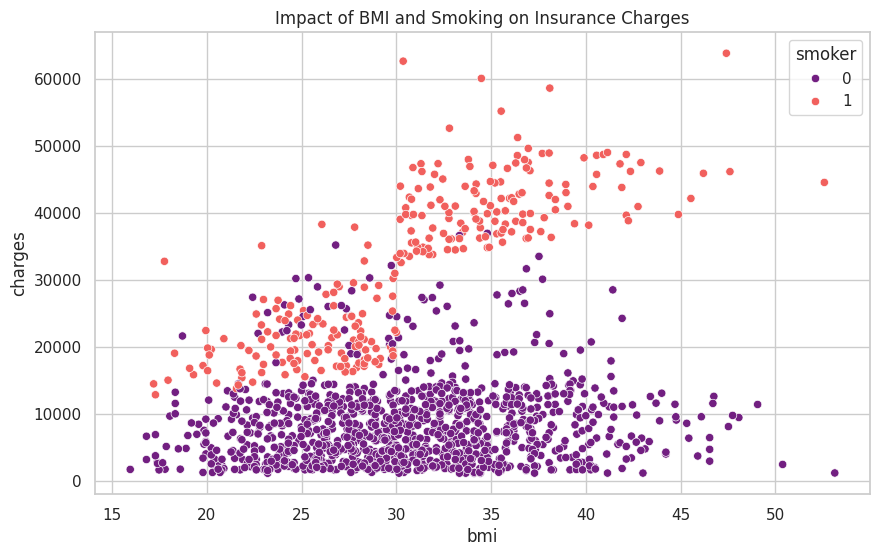

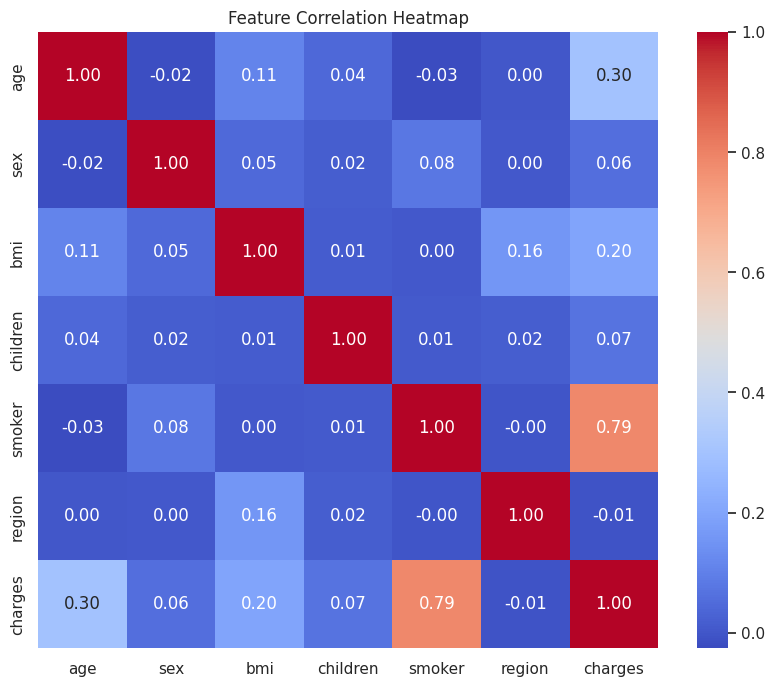

In [5]:
# Set the visual style
sns.set(style="whitegrid")

# Visualizing Age vs Charges with Smoking Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette='viridis')
plt.title('Impact of Age and Smoking on Insurance Charges')
plt.show()

# Visualizing BMI vs Charges with Smoking Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', palette='magma')
plt.title('Impact of BMI and Smoking on Insurance Charges')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

## 5. Model Training and Testing

The dataset is split into a **training set (80%)** and a **testing set (20%)**, after which a **Linear Regression** model is trained on the training data and evaluated using the testing data.


In [6]:
# Defining features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions
y_pred = model.predict(X_test)

print("Model training and testing completed.")

Model training and testing completed.


## 6. Evaluation Metrics

To evaluate the accuracy of the predictions, **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)** are used. These metrics provide quantitative measures of how much the predicted insurance charges typically deviate from the actual medical bills.


Mean Absolute Error (MAE): 4186.51
Root Mean Squared Error (RMSE): 5799.59


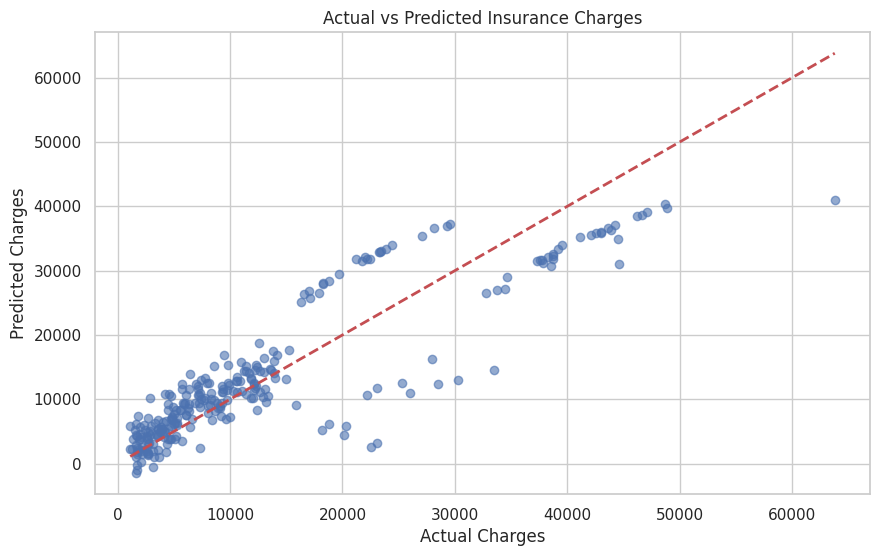

In [8]:
# Performance Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualizing Predictions vs Reality
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.show()

## 7. Conclusion

The analysis reveals several critical insights:

- **Smoking** is the strongest predictor of high medical insurance charges.
- **BMI** and **age** also contribute positively to insurance costs, with high BMI being particularly expensive for smokers.
- The **Linear Regression** model provides a solid baseline for insurance cost estimation.

**Evaluation:**  
The model achieved a **Mean Absolute Error (MAE) of 4,186.51** and a **Root Mean Squared Error (RMSE) of 5,799.59**, indicating the average range of error in predicting medical costs. Further improvements could be made by applying **non-linear models** such as **Random Forest** or **Gradient Boosting** to better capture complex interactions, particularly between **BMI** and **smoking status**.
